# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [4]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

C:\Users\abdal\AppData\Local\Temp\ipykernel_18480\4177423669.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Data/train.csv')


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [251]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [252]:
train.shape

(16861, 28)

In [253]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16861 entries, 0 to 16860
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16861 non-null  object 
 1   Customer_ID               16861 non-null  object 
 2   Month                     16861 non-null  object 
 3   Name                      15193 non-null  object 
 4   Age                       16861 non-null  object 
 5   SSN                       16861 non-null  object 
 6   Occupation                16861 non-null  object 
 7   Annual_Income             16861 non-null  object 
 8   Monthly_Inhand_Salary     14330 non-null  float64
 9   Num_Bank_Accounts         16861 non-null  int64  
 10  Num_Credit_Card           16861 non-null  int64  
 11  Interest_Rate             16861 non-null  int64  
 12  Num_of_Loan               16861 non-null  object 
 13  Type_of_Loan              15005 non-null  object 
 14  Delay_

In [254]:
train.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,1668
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,2531
Num_Bank_Accounts,0


In [255]:
train.duplicated().sum()

0

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

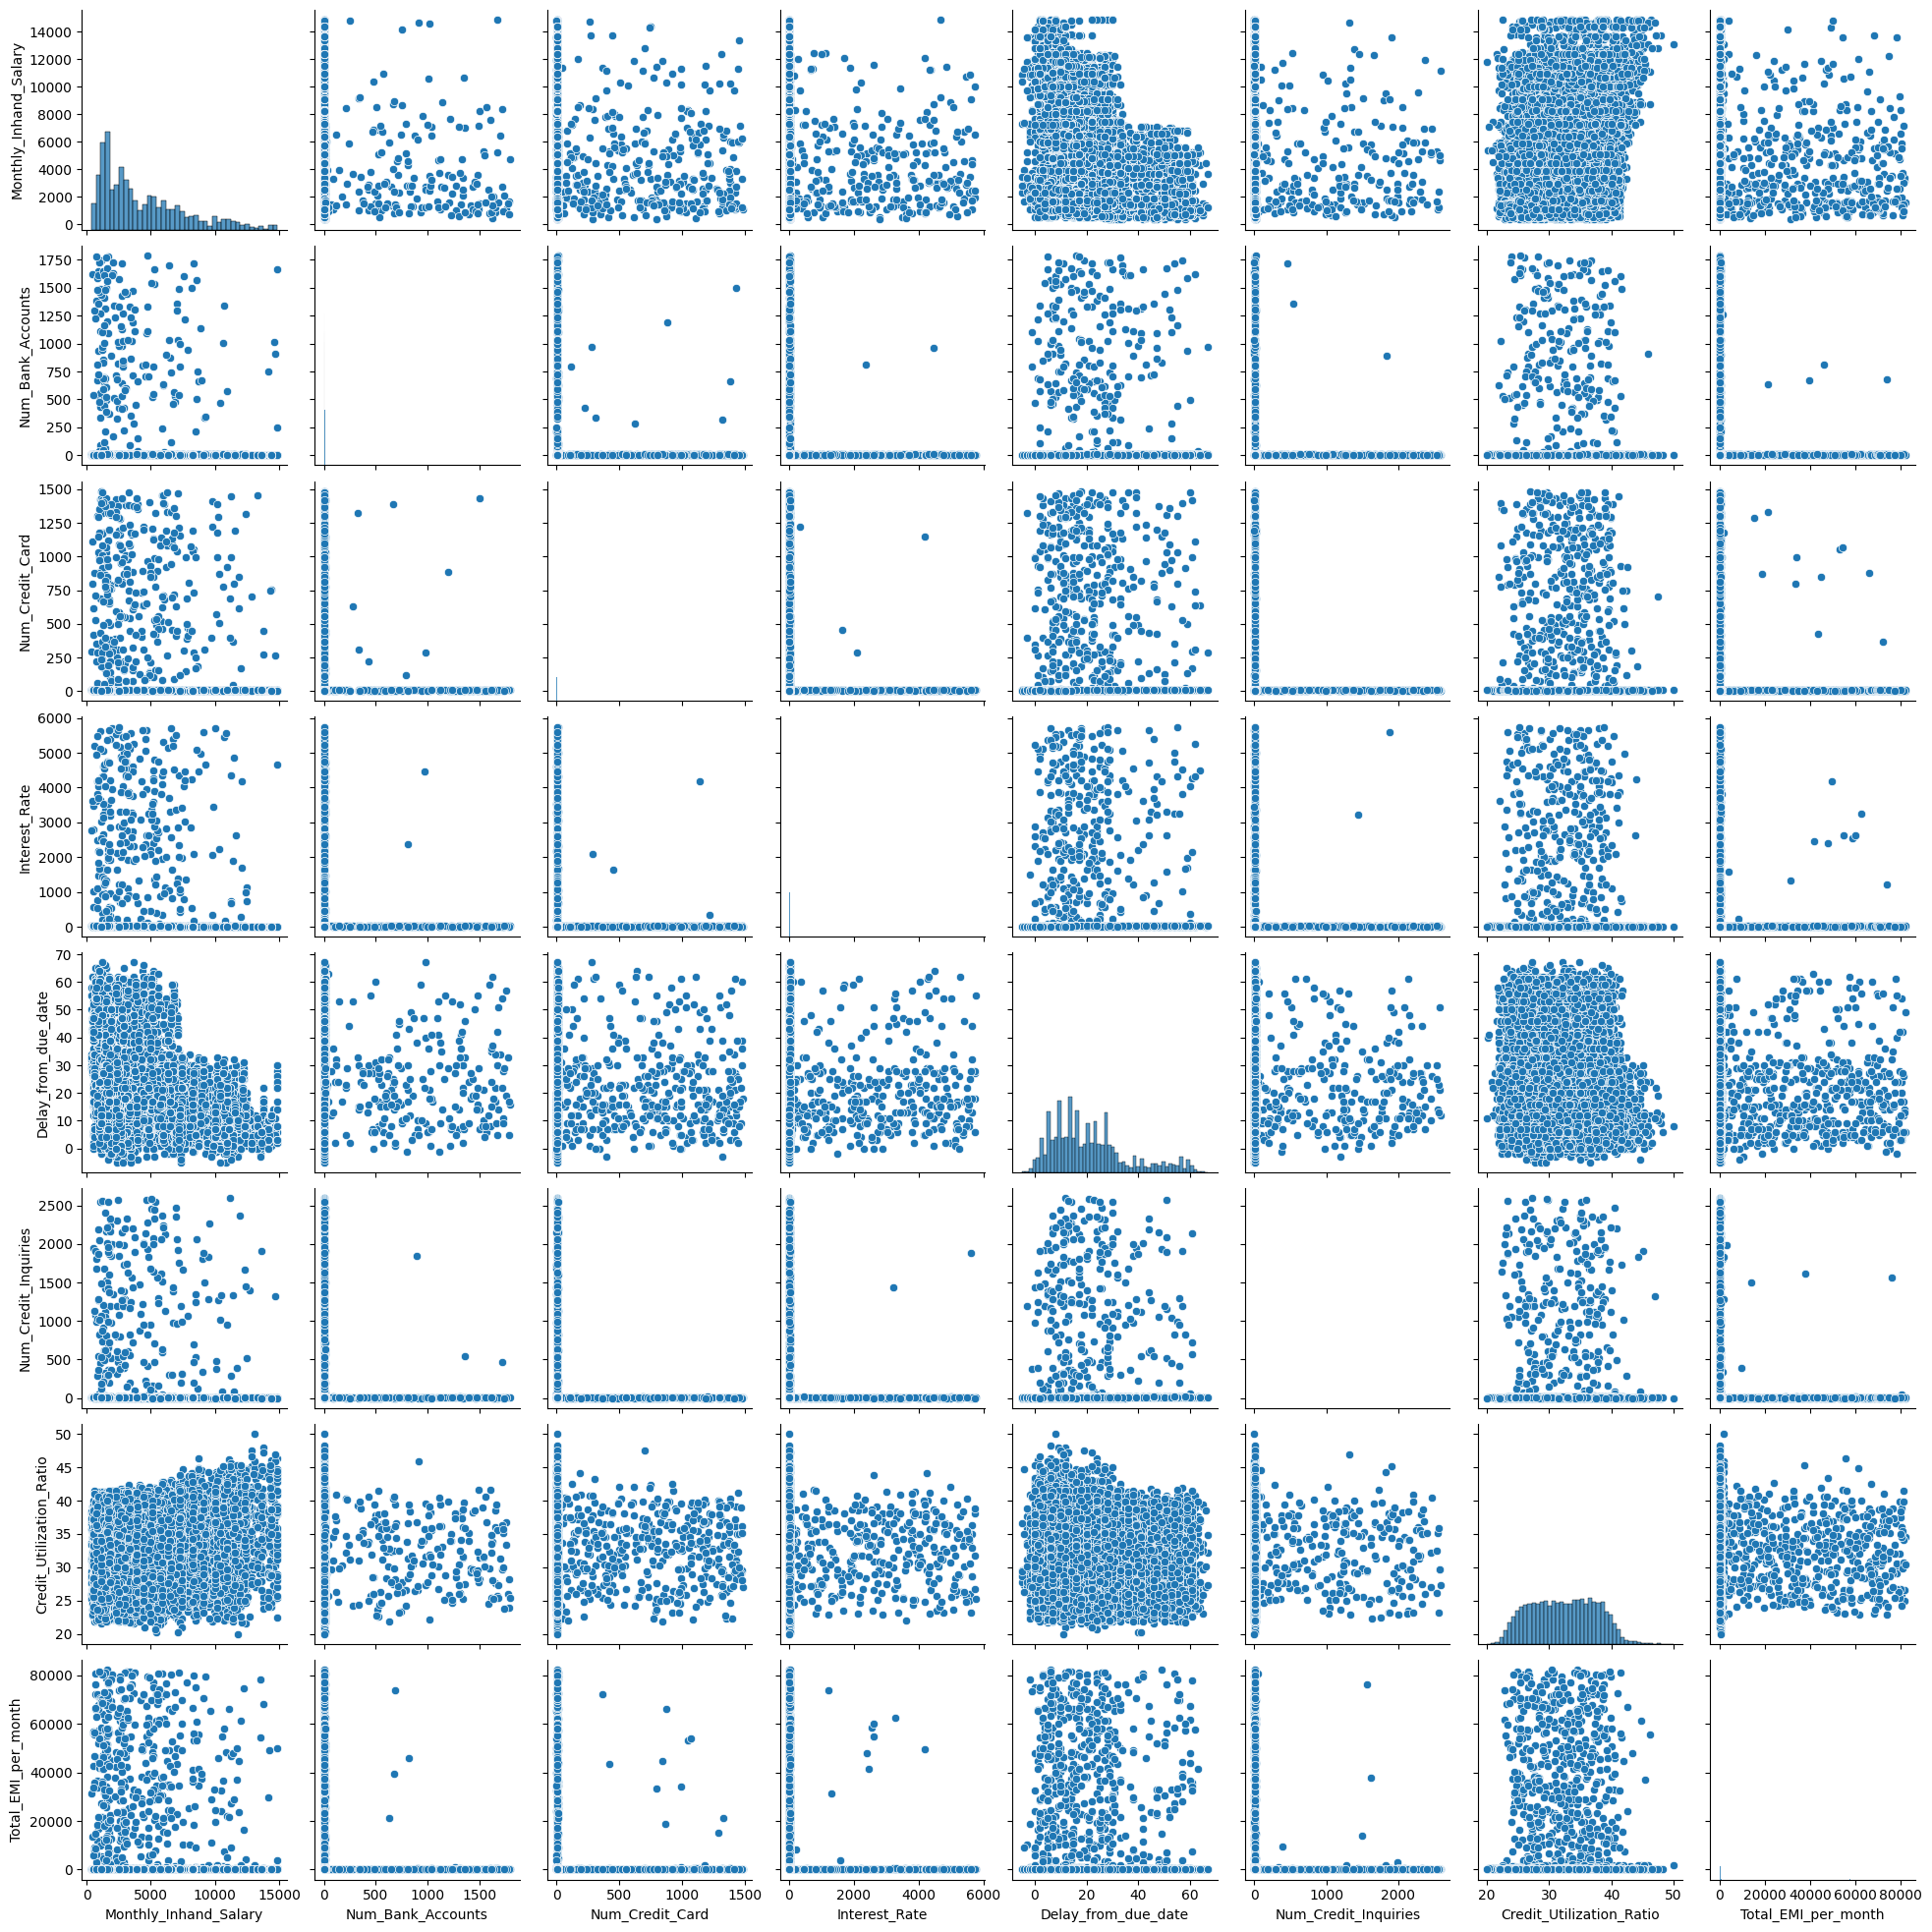

In [256]:
sns.pairplot(train)
plt.show()

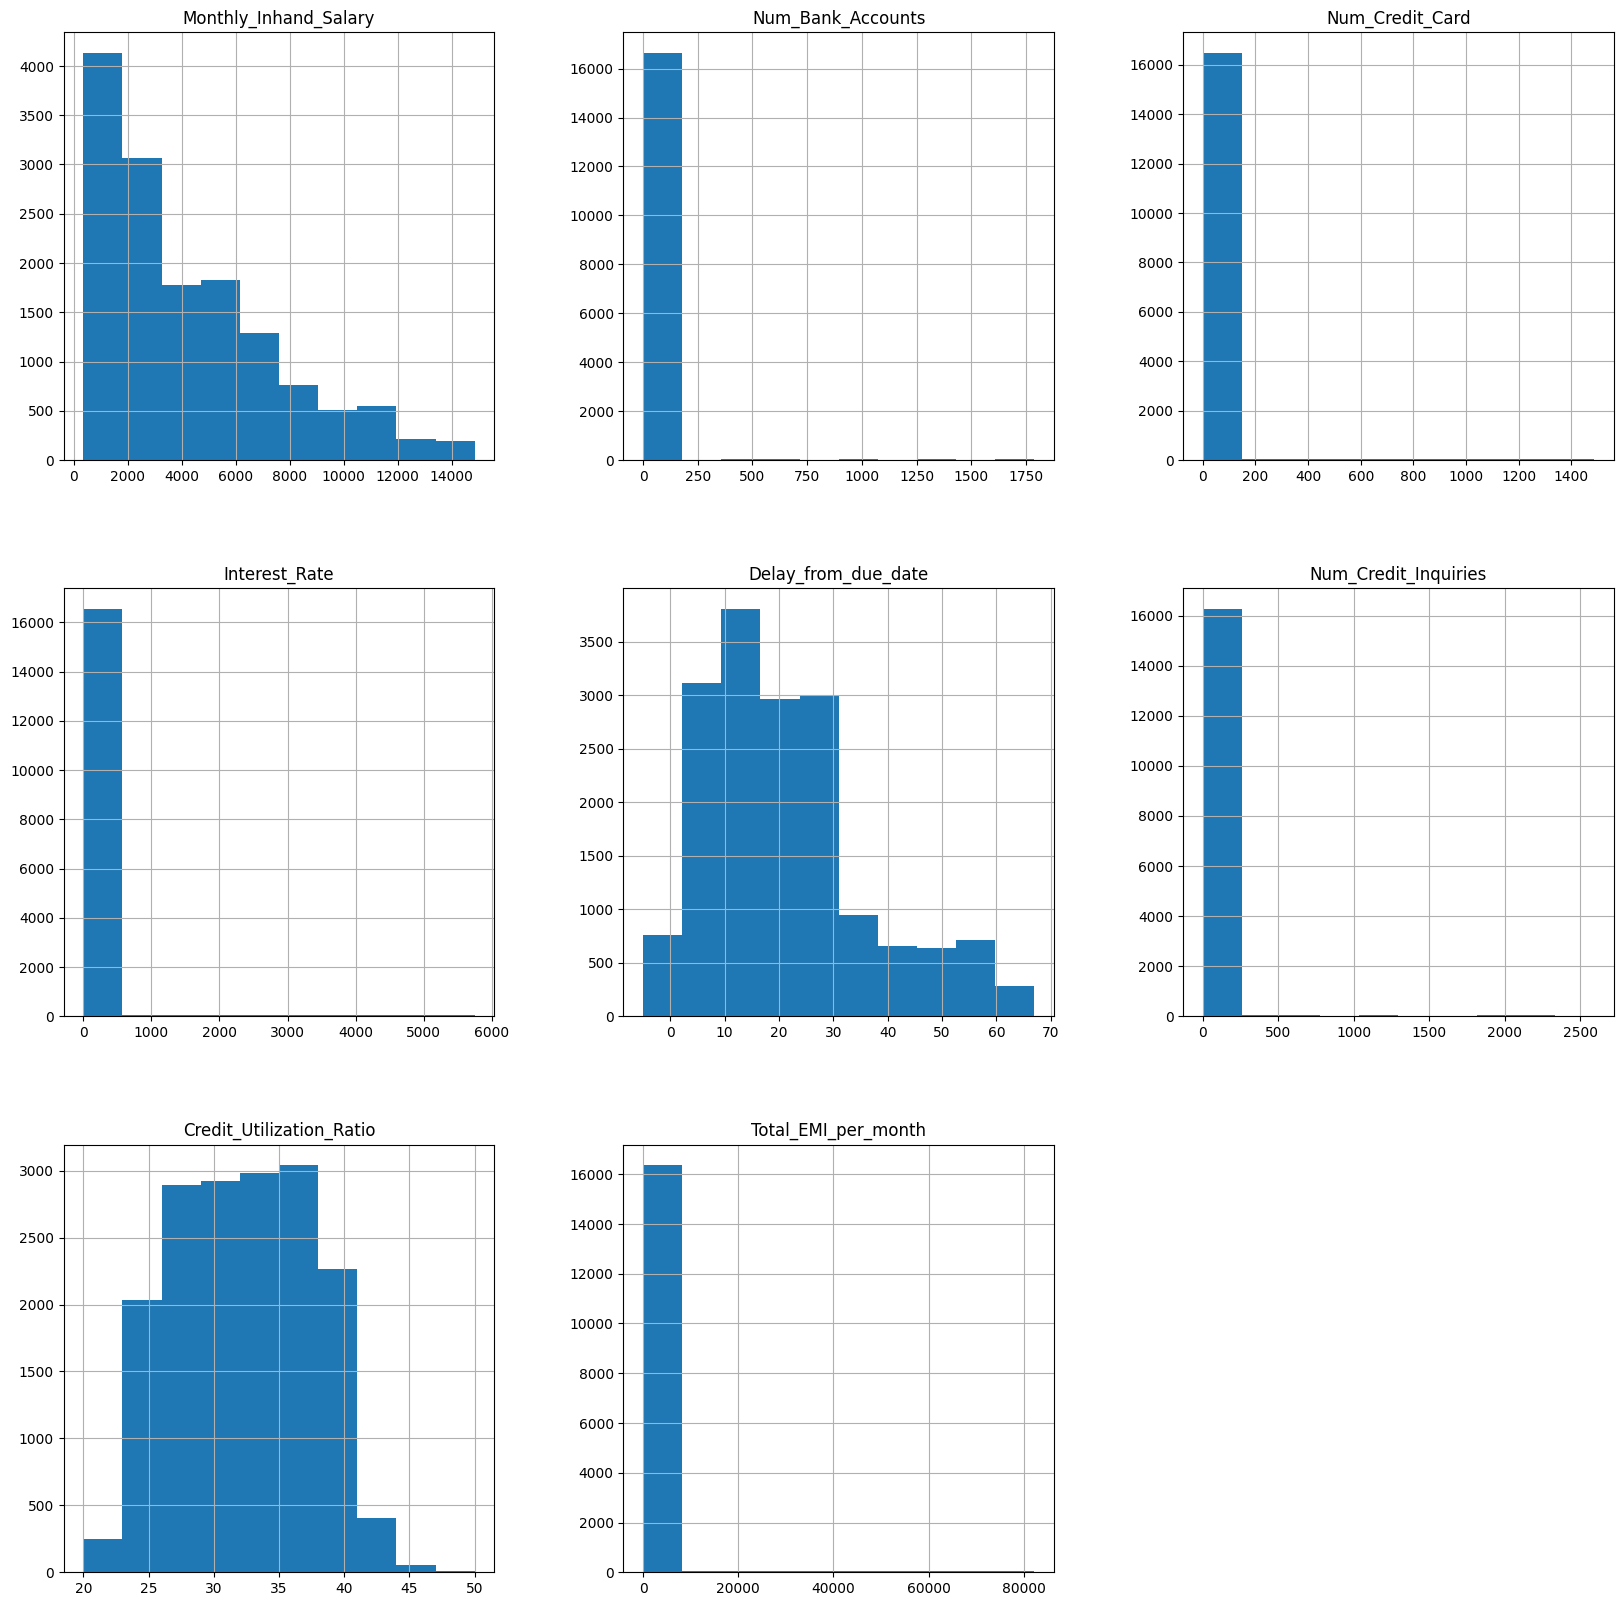

In [257]:
train.hist(figsize=(20, 20))
plt.show()

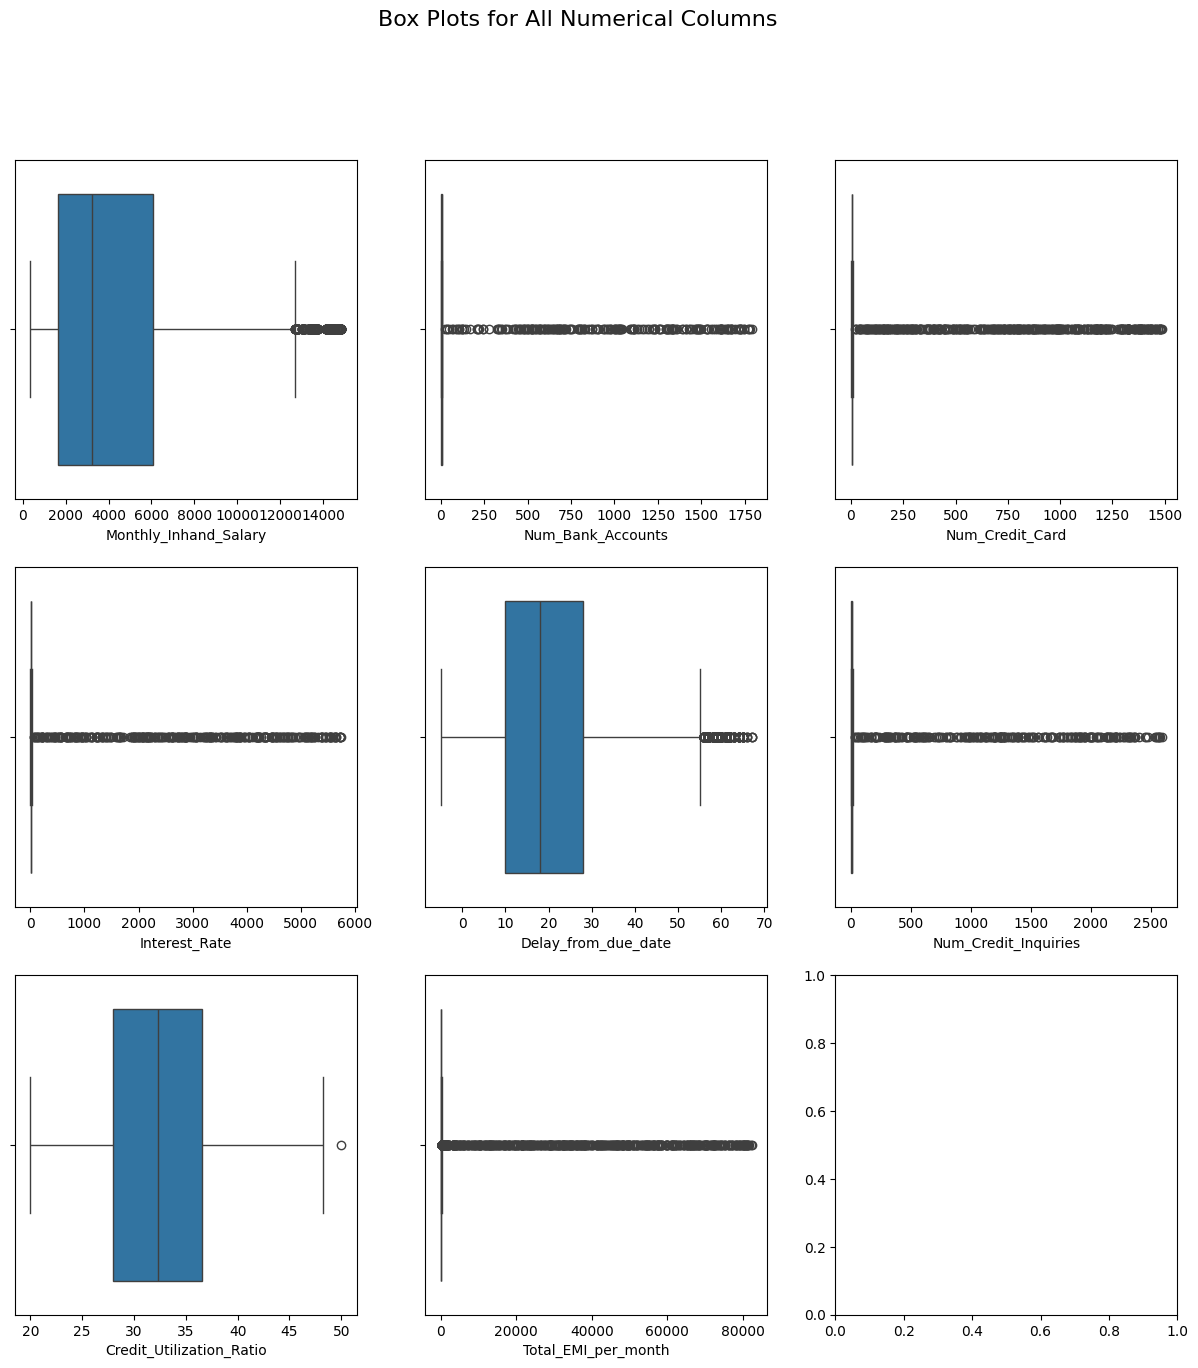

In [258]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Box Plots for All Numerical Columns', fontsize=16)

numerical_columns = train.select_dtypes(include=[np.number]).columns

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(x=train[column], ax=ax)

plt.show()

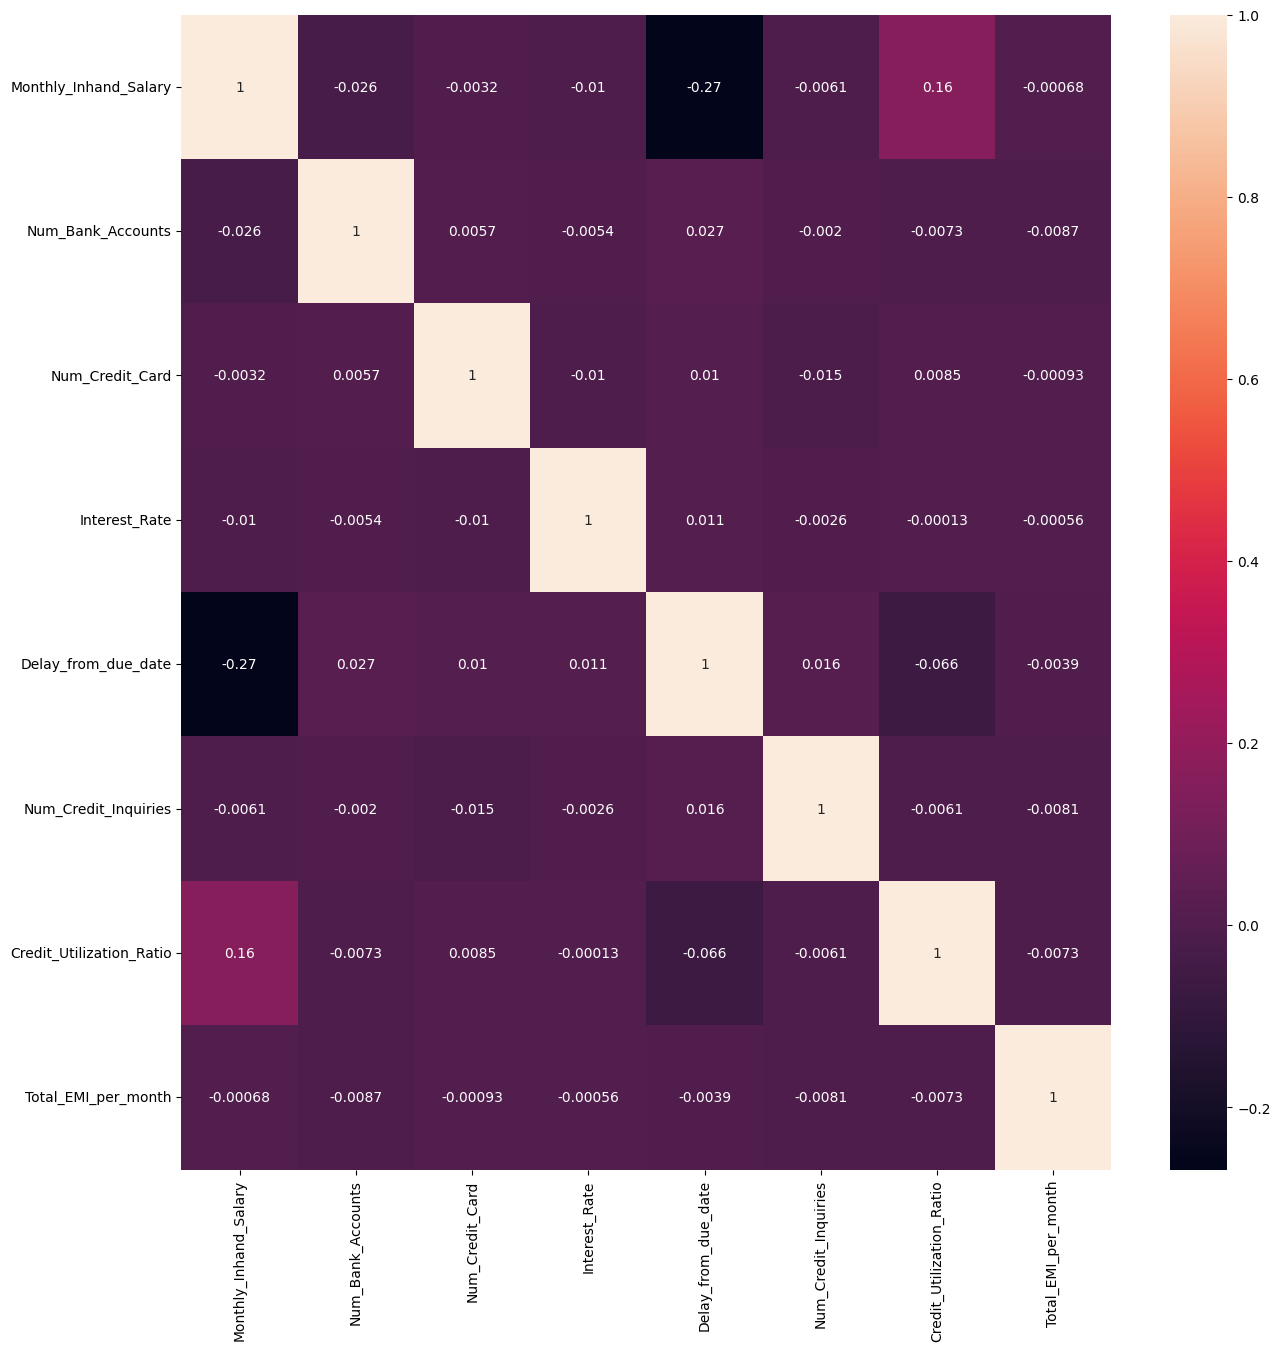

In [259]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.select_dtypes(include=[np.number]).corr(),annot=True)
plt.show()

This graphs before data cleaning and have a lot of outliers and corrupted data

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hints:
- It could be helpful to check `sklearn.preprocessing` module.
- Remember that Support Vector Machine classifiers require special preprocessing.

In [5]:
train = train.map(lambda x: x.replace('_', '') if isinstance(x, str) else x)

In [6]:
train['Occupation'] = train['Occupation'].replace('_______', np.nan)
train['Payment_Behaviour'] = train['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [7]:
columns_to_convert = [
    'Monthly_Balance', 'Amount_invested_monthly', 'Age',
    'Outstanding_Debt', 'Changed_Credit_Limit', 'Num_of_Loan',
    'Annual_Income','Num_of_Delayed_Payment'
]

for column in columns_to_convert:
    train[column] = pd.to_numeric(train[column], errors='coerce')

In [8]:
columns_to_remove_outliers = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
  'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
   'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
   'Amount_invested_monthly','Monthly_Balance'
]

for column in columns_to_remove_outliers:
    Q1 = train[column].quantile(0.15)
    Q3 = train[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train[column] = np.where((train[column] < lower_bound) | (train[column] > upper_bound), np.nan, train[column])


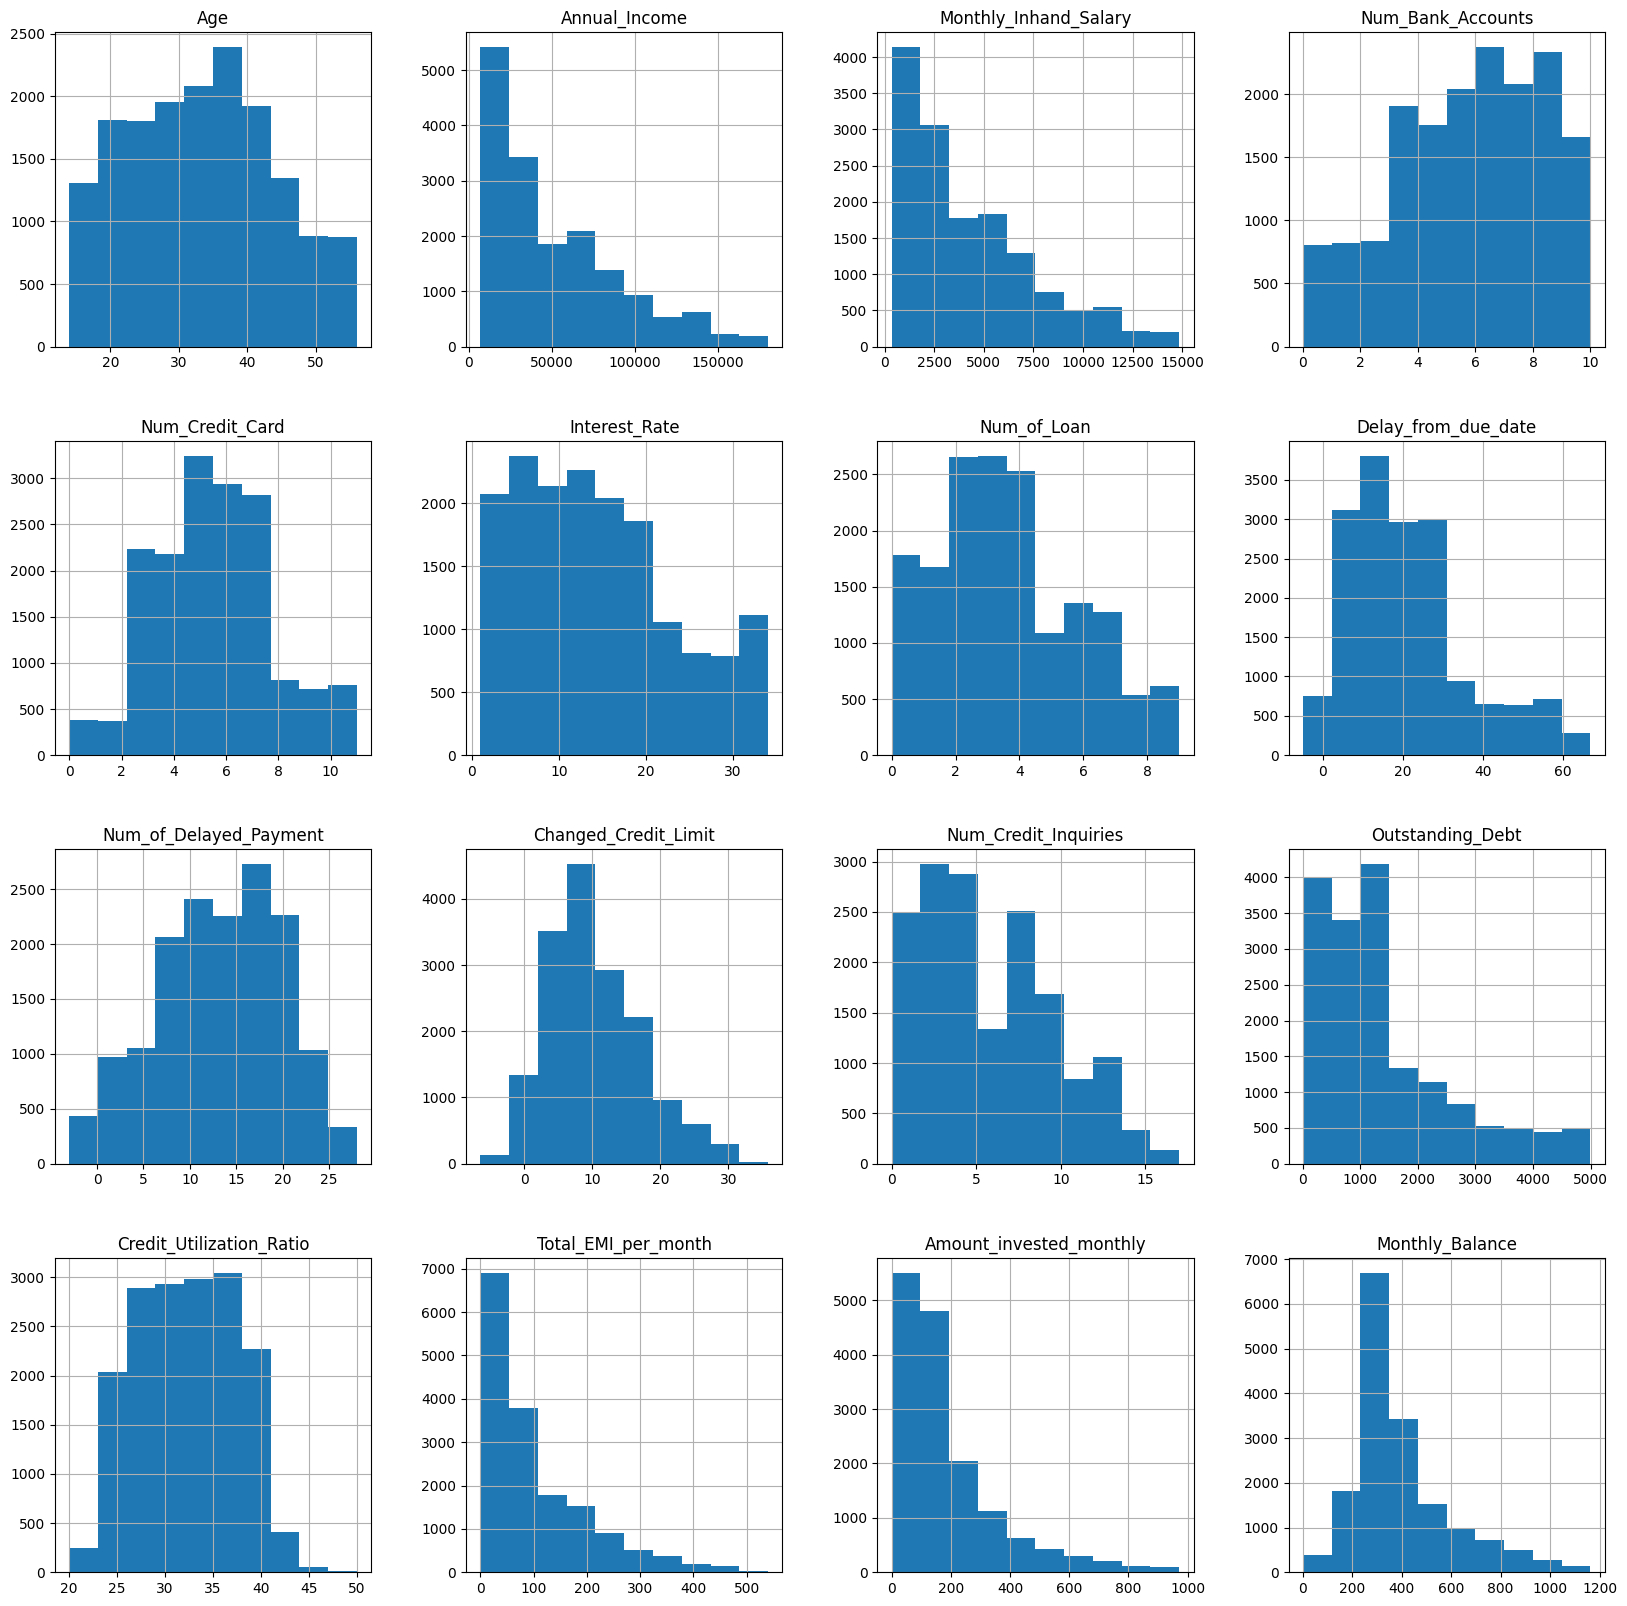

In [264]:
train.hist(figsize=(20, 20))
plt.show()

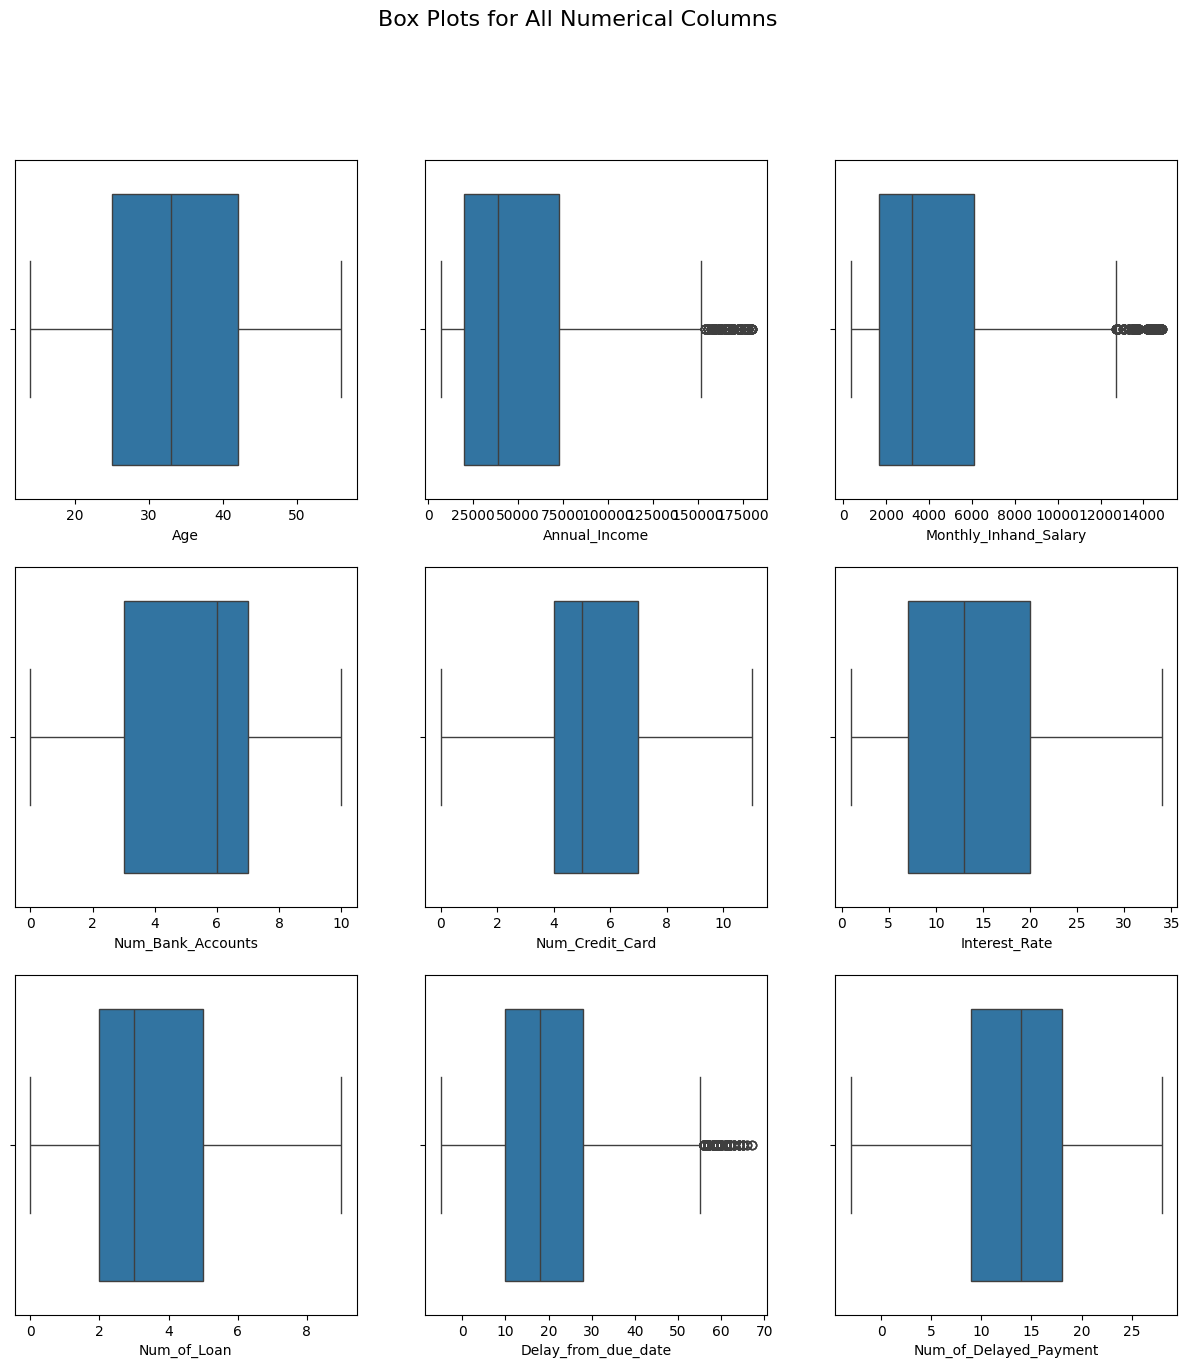

In [265]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Box Plots for All Numerical Columns', fontsize=16)

numerical_columns = train.select_dtypes(include=[np.number]).columns

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(x=train[column], ax=ax)

plt.show()

This graphs after data cleaning and handling outliers and corrupted data

In [9]:
train.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1, inplace=True)

In [10]:
x = train.drop('Credit_Score', axis=1)
y = train['Credit_Score']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=42)

In [270]:
encoder = OrdinalEncoder()
categorical_columns = ['Type_of_Loan', 'Credit_History_Age', 'Occupation', 'Credit_Mix', 'Payment_Behaviour','Payment_of_Min_Amount']

x_train[categorical_columns] = encoder.fit_transform(x_train[categorical_columns])

In [271]:
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)

In [272]:
imputer = KNNImputer()
x_train = imputer.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=x.columns)

In [ ]:
x_train.isnull().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0
Delay_from_due_date,0


In [274]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x.columns)

In [275]:
x_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,1.767257,0.977213,1.988900,2.115211,-1.265038,0.242243,-1.394325,-1.467685,0.415438,-0.962521,...,0.318137,-1.555614,-1.108099,0.089152,-0.808557,-0.564211,-1.024313,3.014486,0.694005,1.426924
1,-0.590253,-1.634971,-0.080951,-0.006997,0.258246,-0.250811,2.219789,2.252243,-1.702700,1.219947,...,0.828791,-0.673901,2.340601,1.389352,1.491691,0.872465,0.917754,-0.391321,-0.420369,-0.154546
2,2.050159,1.194895,-0.894761,-0.974728,-2.026680,0.242243,-1.394325,-0.227709,1.143376,-0.757914,...,-0.192518,-1.555614,-0.150586,0.805735,-0.789932,-0.564211,-0.687628,-0.224576,1.251192,-0.888474
3,-0.307352,-0.328879,-0.558635,-0.472413,1.781529,1.721406,0.073909,0.598942,-1.497454,1.424554,...,1.084118,-1.555614,1.011693,0.186656,-0.845808,0.872465,0.003416,-0.497907,1.251192,-0.200790
4,-0.967455,1.412576,0.765737,0.738137,1.400709,-0.053590,1.203320,1.756253,-0.304291,0.060511,...,1.084118,-0.673901,0.331571,1.261428,1.785974,-2.000886,3.480577,1.066055,-0.866118,-1.470900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,1.672957,-1.417289,0.642912,0.597838,-2.026680,0.242243,-1.168443,-1.054360,0.549532,-0.757914,...,-0.447845,-1.555614,-0.556504,-1.006764,0.970177,-0.564211,3.799885,0.822446,0.694005,-0.278818
13484,-0.495953,0.759531,-0.871590,-0.882416,0.258246,-1.236920,-0.829619,-0.641034,0.913501,-0.075893,...,0.062810,1.089525,-0.228758,-1.386384,-1.181067,-2.000886,-0.819071,-0.623642,-0.420369,-0.490309
13485,-0.778854,-0.111197,2.446543,2.582069,-2.026680,-0.250811,-1.281384,-1.054360,0.938131,-0.075893,...,-0.703172,0.207812,-0.060902,0.930201,-0.752681,-2.000886,0.123416,-0.082328,-1.534742,1.478289
13486,2.050159,-0.764243,-0.833312,-0.744794,-1.645859,0.735297,-1.281384,-0.227709,-0.851613,-0.621510,...,-0.958499,-1.555614,-0.908855,0.879580,-0.817870,-0.564211,-0.627822,-0.120629,0.136818,-0.739792


## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [276]:
x_test[categorical_columns] = encoder.transform(x_test[categorical_columns])

In [277]:
y_test = target_encoder.transform(y_test)

In [278]:
x_test = imputer.transform(x_test)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [279]:
x_test.isnull().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0
Delay_from_due_date,0


In [280]:
x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x.columns)

In [281]:
x_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.824253,0.106485,-0.399183,-0.440659,-1.645859,-1.236920,-0.264914,-0.227709,1.310310,-1.303531,...,-0.703172,0.207812,-0.717859,-0.515614,0.020277,-0.564211,-0.470367,0.032909,1.251192,-0.361791
1,0.729953,0.324167,0.324191,0.257944,-1.265038,-0.250811,-0.716678,-1.054360,-0.249559,-0.962521,...,-0.703172,0.207812,-0.519841,0.112730,-0.342920,-0.564211,-0.670299,0.328882,-0.420369,0.451614
2,-1.061755,-1.634971,-0.861777,-0.854471,-1.265038,-2.223029,-1.168443,-1.467685,-0.361760,-0.485106,...,-0.703172,0.207812,-0.888066,-0.410973,-0.277731,-0.564211,-1.024313,-0.064185,1.251192,-0.664218
3,-0.024450,0.977213,-0.088903,-0.003703,0.258246,1.721406,1.655084,-0.641034,-0.629948,0.333320,...,1.594772,-1.555614,0.418323,-0.077683,1.640695,0.872465,-0.437135,-0.300343,-0.420369,0.759735
4,-0.118751,-0.764243,-0.867875,-0.882119,1.400709,0.735297,2.219789,-0.227709,1.146113,1.356351,...,0.573464,-1.555614,0.927122,-0.467195,1.854888,0.872465,-0.584692,-0.792621,-0.420369,-0.464063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,0.164150,0.324167,-1.124351,-1.212093,1.019888,2.214460,0.073909,1.425592,1.455350,1.492756,...,1.339445,-0.673901,2.343506,-0.379295,-0.445360,0.872465,-0.719809,-0.935340,1.251192,-0.651793
3369,0.258451,0.541849,-0.464143,-0.495839,-0.503396,0.242243,-1.394325,-0.227709,-1.524820,-1.167127,...,0.828791,0.207812,-0.207160,1.279940,-0.607402,-0.564211,-0.432445,-0.601202,-0.977555,-0.135409
3370,-0.401652,-1.634971,-0.548150,-0.460829,0.639067,1.228352,0.186850,1.012267,-0.326184,0.128713,...,1.084118,-0.673901,0.227122,-1.441510,1.957328,0.872465,0.118530,1.116413,1.251192,-1.600823
3371,0.352751,1.194895,-0.434902,-0.437450,-1.645859,-0.250811,-0.942560,-0.641034,0.541322,-1.439935,...,-0.447845,-1.555614,-1.127858,-0.055931,-0.100788,-0.564211,-0.496224,-0.372008,0.136818,-0.103066


----------------------

# `05` Linear Support Vector Machine Classifier

Using `sklearn` implementation of linear support vector machine classifiers to model the data.

Hint: Look for `sklearn.svm.LinearSVC` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

In [282]:
svc = SVC(random_state=1234)
svc.fit(x_train, y_train)

SVC(random_state=1234)

In [283]:
y_pred = svc.predict(x_test)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [284]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.66      0.64       595
           1       0.75      0.65      0.70      1019
           2       0.73      0.77      0.75      1759

    accuracy                           0.71      3373
   macro avg       0.70      0.69      0.69      3373
weighted avg       0.72      0.71      0.71      3373



----------------------

# `06` Kernelized Support Vector Machine Classifier

Using `sklearn` implementation of kernelized support vector machine classifiers to model the data.

Hint: Look for `sklearn.svm.SVC` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$
- `kernel` = 'linear'

In [285]:
svc2 = SVC(kernel= 'linear', random_state=1234)
svc2.fit(x_train, y_train)

SVC(kernel='linear', random_state=1234)

In [286]:
svc2_pred = svc2.predict(x_test)

In [287]:
linear_svc = LinearSVC(random_state=1234)
linear_svc.fit(x_train, y_train)

LinearSVC(random_state=1234)

In [288]:
linear_svc_pred = linear_svc.predict(x_test)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Q` Which metric is more reliable?
`Q` Compare the results to those of `sklearn.svm.LinearSVC` class. Also, is there a difference in the training time?

In [289]:
print(classification_report(y_test, svc2_pred))

              precision    recall  f1-score   support

           0       0.55      0.52      0.54       595
           1       0.64      0.58      0.61      1019
           2       0.66      0.71      0.69      1759

    accuracy                           0.64      3373
   macro avg       0.62      0.61      0.61      3373
weighted avg       0.64      0.64      0.64      3373



In [290]:
print(classification_report(y_test, linear_svc_pred))

              precision    recall  f1-score   support

           0       0.51      0.35      0.42       595
           1       0.63      0.48      0.54      1019
           2       0.61      0.76      0.68      1759

    accuracy                           0.60      3373
   macro avg       0.58      0.53      0.54      3373
weighted avg       0.60      0.60      0.59      3373



## `iii` Kernelization Mode: On

Let's try the both `poly` and `rbf` kernels. Use default $C, \gamma, \space and/or \space degree$ parameter(s) for simplicity if you want. Does kernelization make the model better?

Which of the two kernels performs better?

In [291]:
poly_svc = SVC(kernel= 'poly', random_state=1234)
poly_svc.fit(x_train, y_train)

SVC(kernel='poly', random_state=1234)

In [292]:
poly_svc_pred = poly_svc.predict(x_test)

In [293]:
print(classification_report(y_test, poly_svc_pred))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58       595
           1       0.74      0.60      0.67      1019
           2       0.68      0.81      0.74      1759

    accuracy                           0.70      3373
   macro avg       0.70      0.64      0.66      3373
weighted avg       0.70      0.70      0.69      3373



In [294]:
rbf_svc = SVC(kernel= 'rbf', random_state=1234)
rbf_svc.fit(x_train, y_train)

SVC(random_state=1234)

In [295]:
rbf_svc_pred = rbf_svc.predict(x_test)

In [296]:
print(classification_report(y_test, rbf_svc_pred))

              precision    recall  f1-score   support

           0       0.61      0.66      0.64       595
           1       0.75      0.65      0.70      1019
           2       0.73      0.77      0.75      1759

    accuracy                           0.71      3373
   macro avg       0.70      0.69      0.69      3373
weighted avg       0.72      0.71      0.71      3373



## `iv` Tuning Hyperparameters

Try different  $C, \gamma, \space and/or \space degree$ values and evaluate. What is the best hyperparamters value combination?

Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Hint:` Make sure to tune only relevant hyperparameters per kernel (e.g., don't tune different values for `degree` while using `rbf` kernel)

`Note:` You can tune other parameters as you see fit (but make sure you elaborate your reasoning.

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [297]:
params = [
    {
        'kernel': ['linear'],
        'C': [0.001, 0.01, 0.1, 1, 10]
    }, # Linear
    {
        'kernel': ['poly'],
        'degree': [2, 3, 4, 5],
        'coef0': [0.01, 1, 10, 50],
        'C': [0.001, 0.01, 0.1, 1, 10]
    }, # Poly
    {
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto', 0.01, 1, 2],
        'C': [0.001, 0.01, 0.1, 1, 10]
    } # RBF
]

In [298]:
randomized_search = RandomizedSearchCV(SVC(random_state=1234), param_distributions=params, n_iter=5, cv=3, n_jobs=-1, verbose=3)

In [299]:
randomized_search.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=SVC(random_state=1234), n_iter=5, n_jobs=-1,
                   param_distributions=[{'C': [0.001, 0.01, 0.1, 1, 10],
                                         'kernel': ['linear']},
                                        {'C': [0.001, 0.01, 0.1, 1, 10],
                                         'coef0': [0.01, 1, 10, 50],
                                         'degree': [2, 3, 4, 5],
                                         'kernel': ['poly']},
                                        {'C': [0.001, 0.01, 0.1, 1, 10],
                                         'gamma': ['scale', 'auto', 0.01, 1, 2],
                                         'kernel': ['rbf']}],
                   verbose=3)

In [300]:
pd.DataFrame(randomized_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_degree,param_coef0,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.859717,0.082493,0.663748,0.014952,poly,4.0,1.0,1.000,NaN,"{'kernel': 'poly', 'degree': 4, 'coef0': 1, 'C...",0.721530,0.721308,0.727758,0.723532,0.002990,1
1,7.406626,1.036218,2.305324,0.078923,rbf,NaN,NaN,10.000,1,"{'kernel': 'rbf', 'gamma': 1, 'C': 10}",0.592082,0.590302,0.598087,0.593491,0.003331,3
2,14.136235,0.398996,0.695103,0.032754,poly,2.0,50.0,1.000,NaN,"{'kernel': 'poly', 'degree': 2, 'coef0': 50, '...",0.689057,0.676601,0.684164,0.683274,0.005124,2
3,4.057234,0.058002,1.951823,0.012776,rbf,NaN,NaN,0.001,auto,"{'kernel': 'rbf', 'gamma': 'auto', 'C': 0.001}",0.527358,0.527358,0.527358,0.527358,0.000000,4
4,4.665208,0.490420,1.967014,0.044399,rbf,NaN,NaN,0.001,1,"{'kernel': 'rbf', 'gamma': 1, 'C': 0.001}",0.527358,0.527358,0.527358,0.527358,0.000000,4


In [301]:
randomized_search.best_params_

{'kernel': 'poly', 'degree': 4, 'coef0': 1, 'C': 1}

In [302]:
randomized_search.best_score_

0.723532028469751

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [303]:
best_svc = randomized_search.best_estimator_

In [304]:
best_svc.score(x_test, y_test)

0.7388081826267417

-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

In [ ]:
categorical_columns = ['Type_of_Loan', 'Credit_History_Age', 'Occupation', 'Credit_Mix', 'Payment_Behaviour', 'Payment_of_Min_Amount']
numerical_columns = x_train.drop(columns=categorical_columns).columns.to_list()

numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder()),
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=1234))
])

In [15]:
pipeline.fit(x_train2, y_train2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment',
                                                   'Changed_Credit_Limit',
                                                   'Num_Credit_Inquiries',...
                                                   'Credit_Utilization_Ratio',
                                                   'Total_EMI_per_month',
                                                   'Amount_invested_monthly',
                                                   'Monthly_Balance']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder()),
                                                                  ('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Type_of_Loan',
                                                   'Credit_History_Age',
                                                   'Occupation', 'Credit_Mix',
                                                   'Payment_Behaviour',
                                                   'Payment_of_Min_Amount'])])),
                ('classifier', SVC(random_state=1234))])

In [16]:
y_pred_pipeline = pipeline.predict(x_test2)

In [17]:
print(classification_report(y_test2, y_pred_pipeline))

              precision    recall  f1-score   support

        Good       0.57      0.67      0.62      3527
        Poor       0.75      0.64      0.69      5874
    Standard       0.74      0.76      0.75     10599

    accuracy                           0.71     20000
   macro avg       0.69      0.69      0.68     20000
weighted avg       0.71      0.71      0.71     20000



----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$